# NBA Data Analysis using SQL

There is a great public SQLite dataset on Kaggle called the basketball dataset from Wyatt Walsh:

https://www.kaggle.com/wyattowalsh/basketball

The dataset is explained on Kaggle as such:

"This dataset is updated daily and contains data on all games, all teams, and all players within the NBA including:

* 60,000+ games (every game since the first NBA season in 1946-47) including for the games in which the statistics were recorded:
        Box scores, Game summaries, Officials, Inactive players, Linescores, Last face-off stats, Season series info, Game video availability
* 30 teams with information including:
        General team details (stadium, head coach, general manager, social media links, etc), Franchise history information (name changes, location changes, etc)
* 4500 players with:
        Basic draft data, Prior affiliations, Career statistics. Anatomical data (height & weight)"


This dataset gives us a great opportunity to carry out some data analysis using SQL and answer some questions using historical data.

Additionally, we can use the CIA World Factbook to add some information on the countries from international players. The Factbook contains demographic information like the following:

    population — the global population.
    area — the total land and water area.
    urban area — the urban agglomerations with populations of at least 750,000 people

In this project, we will look through these datasets to find some interesting trends on player profiles that could offer some insight into the development of basketball. 

## Data Exploration

In [1]:
import numpy as np 
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

We can connect to the databases and explore the data:

In [2]:
nba = sqlite3.connect('basketball.sqlite')
world = sqlite3.connect('factbook.db')

In [3]:
nba_tables = pd.read_sql("""SELECT *
                              FROM sqlite_master
                             WHERE type='table';""", nba)
nba_tables

,type,name,tbl_name,rootpage,sql
0,table,Player,Player,2,"CREATE TABLE ""Player"" (\n""id"" TEXT,\n ""full_n..."
1,table,Team,Team,4,"CREATE TABLE ""Team"" (\n""id"" TEXT,\n ""full_nam..."
2,table,Team_Attributes,Team_Attributes,5,"CREATE TABLE ""Team_Attributes"" (\n""ID"" TEXT,\n..."
3,table,Team_History,Team_History,6,"CREATE TABLE ""Team_History"" (\n""ID"" TEXT,\n ""..."
4,table,Player_Attributes,Player_Attributes,15,"CREATE TABLE ""Player_Attributes"" (\n""ID"" TEXT,..."
5,table,Game_Officials,Game_Officials,8375,"CREATE TABLE ""Game_Officials"" (\n""OFFICIAL_ID""..."
6,table,Game_Inactive_Players,Game_Inactive_Players,8997,"CREATE TABLE ""Game_Inactive_Players"" (\n""PLAYE..."
7,table,Team_Salary,Team_Salary,13415,CREATE TABLE `Team_Salary` (\n `nameTeam` TEX...
8,table,Player_Salary,Player_Salary,23558,CREATE TABLE `Player_Salary` (\n `slugSeason`...
9,table,Draft,Draft,23559,"CREATE TABLE `Draft` (\n `yearDraft` REAL,\n ..."


In [4]:
world_tables = pd.read_sql("""SELECT *
                                FROM sqlite_master
                               WHERE type='table';""", world)
world_tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
2,table,cities,cities,2,CREATE TABLE cities (\n id integer prim...


We can check the contents of individual tables to see what kind of information they provide:

In [5]:
attributes = pd.read_sql("""SELECT *
                              FROM Player_Attributes; """, nba)

attributes.head()

,ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,...,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,PTS,AST,REB,ALL_STAR_APPEARANCES,PIE
0,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24T00:00:00,Duke,USA,...,Y,Y,1990,1,25,5.7,0.3,3.3,0.0,NaN
1,76002,Zaid,Abdul-Aziz,Zaid Abdul-Aziz,"Abdul-Aziz, Zaid",Z. Abdul-Aziz,zaid-abdul-aziz,1946-04-07T00:00:00,Iowa State,USA,...,Y,Y,1968,1,5,9.0,1.2,8.0,0.0,NaN
2,76003,Kareem,Abdul-Jabbar,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",K. Abdul-Jabbar,kareem-abdul-jabbar,1947-04-16T00:00:00,UCLA,USA,...,Y,Y,1969,1,1,24.6,3.6,11.2,18.0,NaN
3,51,Mahmoud,Abdul-Rauf,Mahmoud Abdul-Rauf,"Abdul-Rauf, Mahmoud",M. Abdul-Rauf,mahmoud-abdul-rauf,1969-03-09T00:00:00,Louisiana State,USA,...,Y,Y,1990,1,3,14.6,3.5,1.9,0.0,NaN
4,1505,Tariq,Abdul-Wahad,Tariq Abdul-Wahad,"Abdul-Wahad, Tariq",T. Abdul-Wahad,tariq-abdul-wahad,1974-11-03T00:00:00,San Jose State,France,...,Y,Y,1997,1,11,7.8,1.1,3.3,0.0,NaN


In [6]:
cities = pd.read_sql("""SELECT *
                          FROM cities; """, world)

cities.head()

,id,name,population,capital,facts_id
0,1,Oranjestad,37000,1,216
1,2,Saint John'S,27000,1,6
2,3,Abu Dhabi,942000,1,184
3,4,Dubai,1978000,0,184
4,5,Sharjah,983000,0,184


## NBA Player Evolution

Per Wikipedia: 

https://en.wikipedia.org/wiki/NBA_Draft_Combine

"The NBA Draft Combine is a multi-day showcase that takes place every May before the annual June NBA draft. At the combine, college basketball players are measured and take medical tests, are interviewed, perform various athletic tests and shooting drills, and play in five-on-five drills for an audience of National Basketball Association (NBA) coaches, general managers, and scouts. Athletes attend by invitation only. An athlete's performance during the combine can affect perception, draft status, salary, and ultimately the player's career.

The athletic tests include a standing vertical jump, maximum vertical jump, bench press, three-quarter-court sprint time, lane agility time, and modified event time. Physical measurements include height with shoes, height without shoes, wingspan, weight, standing reach, body fat, hand length, and hand width. The shooting tests include spot-up three-point field goals from various distances (high school, college, and NBA) depending upon position, shooting off the dribble, and timed jump shots on the move. Although the NBA Draft Combine is the largest pre-draft gathering for testing and drills, international players can attend a separate Eurocamp at a later date."

In [7]:
draft_combine = pd.read_sql("""SELECT *
                                 FROM Draft_Combine; """, nba)

draft_combine.describe()

,yearCombine,idPlayer,heightWOShoesInches,weightLBS,wingspanInches,reachStandingInches,verticalLeapStandingInches,verticalLeapMaxInches,timeLaneAgility,timeThreeQuarterCourtSprint,...,setOnMoveCollegePct,setOffDribBreakLeftCollegeMade,setOffDribBreakLeftCollegeAttempted,setOffDribBreakLeftCollegePct,setOffDribTopKeyCollegeMade,setOffDribTopKeyCollegeAttempted,setOffDribTopKeyCollegePct,setOffDribBreakRightCollegeMade,setOffDribBreakRightCollegeAttempted,setOffDribBreakRightCollegePct
count,1395.000000,1.395000e+03,1382.000000,1380.000000,1383.000000,1381.000000,1233.000000,1233.000000,1224.000000,1225.000000,...,52.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,2010.412186,1.906012e+06,77.592041,216.063406,82.401012,103.446886,29.186334,34.365775,11.434632,3.285992,...,0.631147,3.193548,5.419355,0.586022,3.258065,5.419355,0.620968,3.161290,5.419355,0.581989
std,6.114756,5.254663e+07,3.420842,26.524917,4.091426,4.974753,3.109899,3.717012,0.610473,0.134492,...,0.111606,1.470133,1.727700,0.188173,1.365473,1.727700,0.215798,1.551274,1.727700,0.209575
min,2001.000000,-1.000000e+00,67.750000,149.200000,70.000000,88.500000,19.500000,21.000000,9.650000,2.910000,...,0.200000,1.000000,4.000000,0.250000,1.000000,4.000000,0.125000,1.000000,4.000000,0.250000
25%,2005.000000,1.213950e+04,75.250000,196.600000,79.500000,100.000000,27.000000,32.000000,11.000000,3.200000,...,0.591545,2.000000,4.000000,0.500000,2.000000,4.000000,0.500000,2.000000,4.000000,0.500000
50%,2010.000000,2.015920e+05,78.000000,214.000000,82.750000,104.000000,29.000000,34.500000,11.370000,3.270000,...,0.627717,3.000000,4.000000,0.500000,3.000000,4.000000,0.666667,3.000000,4.000000,0.500000
75%,2016.000000,1.626162e+06,80.250000,234.000000,85.250000,107.000000,31.500000,37.000000,11.780000,3.370000,...,0.700000,4.000000,7.000000,0.750000,4.000000,7.000000,0.750000,4.000000,7.000000,0.750000
max,2021.000000,1.962937e+09,89.250000,334.000000,98.250000,122.500000,39.500000,45.500000,14.450000,3.810000,...,0.823529,7.000000,8.000000,1.000000,6.000000,8.000000,1.000000,7.000000,8.000000,1.000000


We can see that it includes measurements from the past 20 years, which enables us to check how the average player height and wingspan have evolved over that time span:

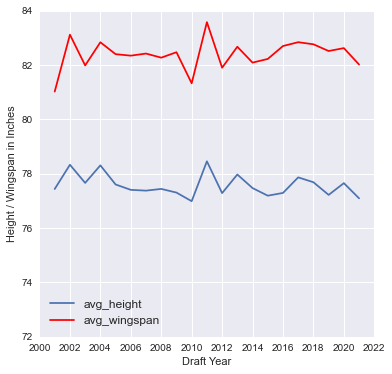

In [8]:
measure = pd.read_sql("""SELECT Draft_Combine.yearCombine as year,
                                AVG(Draft_Combine.heightWOShoesInches) As height,
                                AVG(Draft_Combine.wingspanInches) As wingspan
                           FROM Draft_Combine
                          GROUP BY year;""", nba)

plt.style.use(style='seaborn')
plt.rcParams['figure.figsize'] = (6, 6)
plt.plot(measure['year'], measure['height'], label = 'avg_height')
plt.plot(measure['year'], measure['wingspan'], label = 'avg_wingspan', color='r')
plt.xticks((np.arange(2000, 2024, step=2)))
plt.yticks((np.arange(72, 86, step=2)))
plt.xlabel('Draft Year')
plt.ylabel('Height / Wingspan in Inches')
plt.legend(fontsize = 12)
plt.show()

As seen, the average height seems to be around 77,6 inches (197 cm) and average wingspan is 82.4 inches (209 cm). So the average NBA player has a wingspan about 5 inches longer than their height which is incredible considering the overall world population. 

David Epstein, in his book The Sports Gene, says that most people have an arm length-to-height ratio of 1.01-to-1. By contrast, Epstein reports that the average NBA player has an arms-to-height ratio of 1.06-to-1, which our dataset confirms. This figure is actually greater than 1.05 which is the diagnostic criteria for Marfan syndrome, a disorder of the body’s connective tissues that often results in elongated limbs.

Sources:
https://en.wikipedia.org/wiki/The_Sports_Gene

https://en.wikipedia.org/wiki/Marfan_syndrome

The ratio of wingpsan to height has been a fascination for scientists for centuries as "the Roman writer, architect and engineer Vitruvius from prior to 15 BC noted that a "well made man" has an arm span equal to his height, as exemplified in Leonardo da Vinci's c. 1492 drawing, the Vitruvian Man."

We can extend the query to include all of the measurements and player names:

In [9]:
measure = pd.read_sql("""SELECT dr.namePlayer AS player,
                                (pl.TO_YEAR - pl.FROM_YEAR + 1) AS years_active,
                                pl.TEAM_NAME AS team,
                                dr.heightWOShoesInches AS height,
                                dr.wingspanInches AS wingspan,
                                CAST(dr.wingspanInches/dr.heightWOShoesInches AS Float) AS ratio,
                                pl.PTS AS pts,
                                pl.ALL_STAR_APPEARANCES AS allstar,
                                pl.ROSTERSTATUS AS status
                           FROM Draft_Combine AS dr
                                LEFT JOIN Player_Attributes AS pl
                                ON pl.id = dr.idPlayer
                          ORDER BY ratio DESC;""", nba)

measure.head()

,player,years_active,team,height,wingspan,ratio,pts,allstar,status
0,Doug Wrenn,NaN,None,77.75,91.50,1.176849,NaN,NaN,None
1,Talen Horton-Tucker,2.0,Lakers,74.50,85.25,1.144295,8.0,NaN,Active
2,Will Solomon,8.0,,71.75,81.50,1.135889,5.1,0.0,Inactive
3,Jason Maxiell,10.0,Pistons,77.00,87.25,1.133117,5.6,0.0,Inactive
4,Fred Jones,7.0,Pacers,74.25,84.00,1.131313,7.5,0.0,Inactive


The highest wingspan/height ratio measured at the combine belongs to Doug Wrenn, who has been called the best basketball player from Seattle not to make the NBA. Among the players who made it to NBA, Talen Horton-Tucker has the highest ratio, who currently plays for Los Angeles Lakers. 

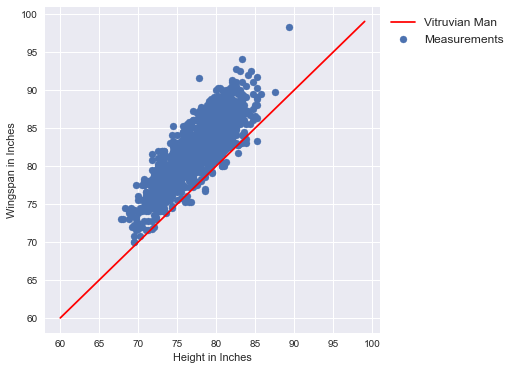

In [10]:
plt.scatter(measure['height'], measure['wingspan'], label='Measurements')
plt.plot((np.arange(60, 100)),(np.arange(60, 100)), color='r', label='Vitruvian Man')
plt.xlabel('Height in Inches')
plt.ylabel('Wingspan in Inches')
plt.legend(bbox_to_anchor=(1, 1), fontsize=12)
plt.show()

We can see that most players are above the Vitruvian Man line which represents an wingspan/height ratio of 1.0. Let's see how many players have a negative wingspan, that is shorter wingspan than height:

In [11]:
negative_wingspan = measure[measure['ratio'] < 1.0]
print('{} players out of {} measured ({}%) have a negative wingspan'.format(len(negative_wingspan), 
                                                                    len(measure), 
                                                                    round(len(negative_wingspan)/len(measure), 3)))
negative_wingspan[negative_wingspan['years_active'] > 0]

17 players out of 1395 measured (0.012%) have a negative wingspan


,player,years_active,team,height,wingspan,ratio,pts,allstar,status
1365,Mario Kasun,2.0,Magic,83.75,83.50,0.997015,2.7,0.0,Inactive
1366,Mason Plumlee,8.0,Pistons,83.25,83.00,0.996997,10.3,NaN,Active
1368,Ty Jerome,2.0,Thunder,76.25,76.00,0.996721,9.9,NaN,Active
1370,Frank Kaminsky,6.0,Suns,83.75,83.00,0.991045,6.6,NaN,Active
1371,Antonis Fotsis,1.0,Grizzlies,81.25,80.50,0.990769,3.9,0.0,Inactive
1374,JJ Redick,15.0,Pelicans,76.00,75.25,0.990132,8.7,NaN,Active
1375,Kelly Olynyk,8.0,Heat,82.75,81.75,0.987915,10.0,NaN,Active
1376,Dan Langhi,4.0,,81.00,80.00,0.987654,3.0,0.0,Inactive
1377,Tyler Herro,2.0,Heat,76.50,75.25,0.983660,15.1,NaN,Active
1378,Svi Mykhailiuk,3.0,Thunder,78.50,77.00,0.980892,7.0,NaN,Active


As seen, only 17 players were measured to have a negative wingspan over the past 20 years. Out of these players, only 12 have played in the league with the most prominent name being JJ Redick, who recently retired after 15 seasons averaging 8.7 points. We can also see that there are no all-stars among this group.
We can also check how many players fit the classification of Vitruvian Man:

In [12]:
measure[measure['ratio'] == 1.0]

,player,years_active,team,height,wingspan,ratio,pts,allstar,status
1358,LaVell Blanchard,NaN,None,78.00,78.00,1.0,NaN,NaN,None
1359,Jason Kapono,9.0,,78.50,78.50,1.0,6.7,0.0,Inactive
1360,Sasha Vujacic,13.0,Lakers,77.50,77.50,1.0,5.3,0.0,Inactive
1361,Travis Diener,5.0,Pacers,71.75,71.75,1.0,4.8,0.0,Inactive
1362,Jared Jordan,NaN,None,72.00,72.00,1.0,NaN,NaN,None
1363,Jason Smith,12.0,,82.75,82.75,1.0,6.1,0.0,Inactive
1364,Cody Zeller,8.0,Hornets,82.75,82.75,1.0,9.2,NaN,Active


Only 5 Vitruvian Men played in the NBA and none of them have made any all-star team. Finally, we can check the distribution of wingspan/height ratio:

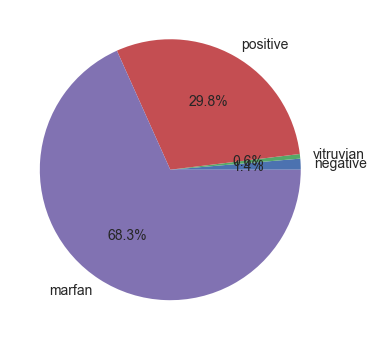

In [13]:
measured_nba_players = measure[measure['years_active'] > 0]
negative = len(measured_nba_players[measured_nba_players['ratio'] < 1.0])
vitruvian = len(measured_nba_players[measured_nba_players['ratio'] == 1.0])
positive = len(measured_nba_players[(measured_nba_players['ratio'] > 1.0) & (measured_nba_players['ratio'] <= 1.05)])
marfan = len(measured_nba_players[measured_nba_players['ratio'] > 1.05])
plt.pie(([negative,vitruvian,positive,marfan]), labels=['negative','vitruvian','positive','marfan'], 
        autopct='%1.1f%%', textprops={'fontsize': 14})
plt.show()

As seen, 68.3% of NBA players over the last 20 years fit the diagnostic criteria for Marfan syndrome. About 98% of players have had longer wingspans than height, which shows why wingspan is regarded as highly as athletic abilities such as jumping and running.

## Team Salary Analysis

Like other North American professional sports leagues, NBA has a salary cap to limit the total amount of money that teams are allowed to pay their players, which is used to benefit parity. Depending on the revenue that the league generates, the salary cap increases or decreases from year to year. NBA has a soft salary cap which allows teams to go above the salary cap, but will subject such teams to reduced privileges in free agency and to the luxury tax. Therefore most championship-caliber teams pay the luxury tax to be able to get the best players, while the so-called rebuilding teams stay below the cap limit to benefit the extra tax money distributed around the league. The amount of willingness to go above the salary cap depends on the owner and the market size. 

In this section, we will use the 2020-21 season since it is last season with complete data. According to the Washington post, the 2020-21 salary cap was set at \\$109.1 million and the luxury tax line was at \\$132.6 million, identical to the previous year.

https://www.washingtonpost.com/sports/2020/11/10/sports-nba-salary-cap/

So we can start with the total salaries from each team:

In [14]:
team_salary = pd.read_sql("""SELECT slugTeam AS Team,
                                    [X2020-21] AS Salary
                               FROM Team_Salary
                              ORDER BY Salary;""", nba)
team_salary.describe()

,Salary
count,3.000000e+01
mean,1.294014e+08
std,1.625246e+07
min,9.159991e+07
25%,1.276066e+08
50%,1.298446e+08
75%,1.341496e+08
max,1.704673e+08


As seen, the salary varies between 91.5 mil and 170.5 mil with the average of 129.4 mil being just short of the luxury tax line. We can check which teams stayed below the luxury tax line:

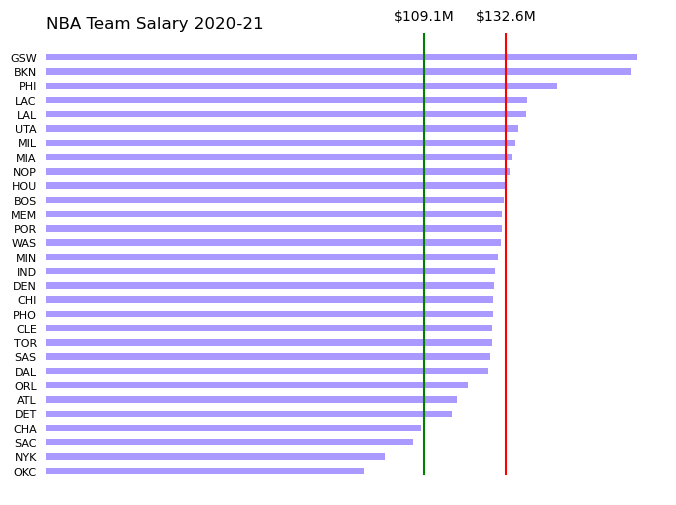

In [15]:
plt.style.use(style='default')
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(team_salary['Team'],
        team_salary['Salary'],
        height=0.45, color='#aa99ff')
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
ax.set_xticks([109100000, 132600000])
ax.set_xticklabels(['$109.1M', '$132.6M'])
ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', labelsize=8)
ax.text(x=-80000, y=31,
        s='NBA Team Salary 2020-21',
        size=12)
# ax.set_yticklabels([]) # an empty list removes the labels
# team_names = team_salary['Team']
# for i, team in zip(range(30), team_names):
#     ax.text(x=-80000, y=i-0.15, s=team, fontsize=8)
ax.axvline(x=109100000, ymin=0.045, c='green', alpha=1)
ax.axvline(x=132600000, ymin=0.045, c='red', alpha=1)
plt.show()

We can see that only 4 teams stayed below the salary cap with OKC having the lowest salary total by design as they are trying to develop young players who usually have low salary figures. On the other end of the spectrum, we see 9 luxury tax teams, who are all competitive with the exception of New Orleans. Golden State Warriors and Brooklyn Nets have by far the highest payrolls as they employ 3 max. salary players each. 

In [16]:
team_perf = pd.read_sql("""SELECT game.Team, SUM(game.W) AS W, SUM(game.L) AS L,
                                  SUM(game.W + game.L) AS Total,
                                  salary.[X2020-21] AS Salary
                             FROM (SELECT SEASON_ID,
                                          TEAM_ABBREVIATION_HOME AS Team,
                                          SUM(WL_HOME == 'W') AS W,
                                          SUM(WL_HOME == 'L') AS L
                                     FROM Game
                                    WHERE SEASON_ID == 22020
                                    GROUP BY Team

                                    UNION

                                    SELECT SEASON_ID,
                                          TEAM_ABBREVIATION_AWAY AS Team,
                                          SUM(WL_AWAY == 'W') AS W,
                                          SUM(WL_AWAY == 'L') AS L
                                     FROM Game
                                    WHERE SEASON_ID == 22020
                                    GROUP BY Team
                                    ) AS game
                                   LEFT JOIN Team_Salary AS salary
                                   ON salary.slugTeam = game.Team
                             GROUP BY Team;""", nba)

team_perf.head()

,Team,W,L,Total,Salary
0,ATL,41,31,72,118647039.0
1,BKN,48,23,71,168854452.0
2,BOS,37,36,73,132032864.0
3,CHA,33,39,72,108218809.0
4,CHI,31,41,72,128963580.0


Teams played a shortened 72-game season last year due to the pandemic. However, we can see from the query that some games are missing. The teams with a full 72-game record have the correct record if we compare it with the standings from NBA stats website:

https://www.nba.com/standings?GroupBy=conf&Season=2020-21&Section=overall

Also the team abbreviation for Phoenix seems to be coded with PHX instead of PHO as in the team salary table which is why the salary is missing. We need to clean the dataframe manually before analysis:

In [17]:
missing_rows = team_perf[team_perf['Total'] != 72]
team_perf.loc[team_perf['Team'] == 'PHX', 'Salary'] = 128858241

missing_dict = {'BKN':48, 'BOS':36, 'DAL':42, 'DEN':47, 'GSW':39, 'HOU':17, 'IND':34,
               'LAC':47, 'LAL':42, 'MEM':38, 'MIL':46, 'MIN':23, 'NYK':41, 'OKC':22,
               'PHX':51, 'POR':42, 'SAC':31, 'SAS':33, 'TOR':27, 'UTA':52}

for team in missing_rows['Team']:
    team_perf.loc[team_perf['Team'] == team, 'W'] = missing_dict[team]
    
team_perf['Total'] = 72

team_perf['L'] = team_perf['Total'] - team_perf['W']
    
team_perf.sort_values('W', ascending=False).reset_index(drop=True)

,Team,W,L,Total,Salary
0,UTA,52,20,72,136048278.0
1,PHX,51,21,72,128858241.0
2,PHI,49,23,72,147401509.0
3,BKN,48,24,72,168854452.0
4,LAC,47,25,72,138604159.0
5,DEN,47,25,72,129184135.0
6,MIL,46,26,72,135289205.0
7,POR,42,30,72,131426055.0
8,DAL,42,30,72,127507823.0
9,LAL,42,30,72,138326578.0


Now that we have the correct win records, we can see how the team salaries translated into wins:

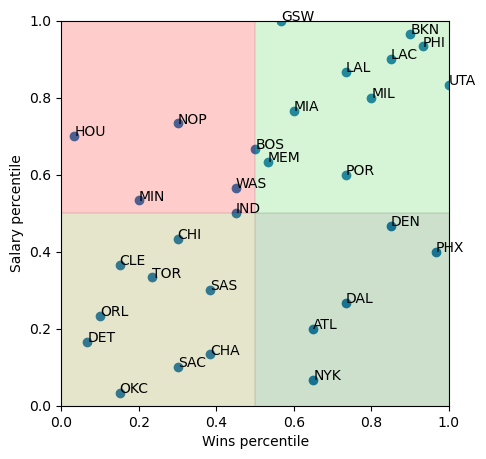

In [18]:
# We can use percentile rank to have the two factors in the same scale
team_perf['W_perc'] = team_perf['W'].rank(pct = True)
team_perf['Salary_perc'] = team_perf['Salary'].rank(pct = True)

plt.figure(figsize=(5,5))
X = team_perf['W_perc']
Y = team_perf['Salary_perc']
plt.scatter(X,Y)
plt.axvline(x=0.5, linewidth=0.1, color='k')
plt.axhline(y=0.5, linewidth=0.1, color='k')
plt.xlabel('Wins percentile')
plt.ylabel('Salary percentile')
plt.xlim(0,1)
plt.ylim(0,1)
plt.fill_between((0.5,1), y1=0.5, y2=1, facecolor='limegreen', alpha=0.2)
plt.fill_between((0.5,1), y1=0, y2=0.5, facecolor='darkgreen', alpha=0.2)
plt.fill_between((0,0.5), y1=0.5, y2=1, facecolor='red', alpha=0.2)
plt.fill_between((0,0.5), y1=0, y2=0.5, facecolor='olive', alpha=0.2)
for i, label in enumerate(team_perf['Team']):
    plt.annotate(label, (X[i], Y[i]))
plt.show()

The perfect scenario for team owners and general managers would be to build a low-cost team that would win the most games. Using that criteria, we were able to identify 4 regions based on the salary vs. wins rankings. Ideally teams would like to be in the bottom right quadrant and would like to avoid the top left. As seen, Phoenix Suns seems to be the most cost-effective team in the league last season. We can develop a cost-effectiveness parameter based on the percentile ranks and find the top 5 teams:

In [19]:
team_perf['dev'] = (team_perf['W_perc'] - team_perf['Salary_perc']) / np.sqrt(2)
team_perf.sort_values('dev', ascending=False).reset_index(drop=True).head()

,Team,W,L,Total,Salary,W_perc,Salary_perc,dev
0,NYK,41,31,72,97613692.0,0.650000,0.066667,0.412479
1,PHX,51,21,72,128858241.0,0.966667,0.400000,0.400694
2,DAL,42,30,72,127507823.0,0.733333,0.266667,0.329983
3,ATL,41,31,72,118647039.0,0.650000,0.200000,0.318198
4,DEN,47,25,72,129184135.0,0.850000,0.466667,0.271058


The top 5 cost-effective teams all made the play-offs with Phoenix Suns going to the finals. 

In [20]:
team_perf.sort_values('dev', ascending=False).reset_index(drop=True).tail()

,Team,W,L,Total,Salary,W_perc,Salary_perc,dev
25,CLE,22,50,72,128629143.0,0.150000,0.366667,-0.153206
26,MIN,23,49,72,130280289.0,0.200000,0.533333,-0.235702
27,NOP,31,41,72,133689123.0,0.300000,0.733333,-0.306413
28,GSW,39,33,72,170467299.0,0.566667,1.000000,-0.306413
29,HOU,17,55,72,132836984.0,0.033333,0.700000,-0.471405


The least successful team in terms of team-building was by far the Houston Rockets who had to trade James Harden mid-season and therefore decided to lose as many games as possible for a high draft pick. 

Finally, we can check how the rosters are built based on draft positions:

In [21]:
pl_salary = pd.read_sql("""SELECT tm.slugTeam AS Team,
                                  pl.namePlayer AS Player,
                                  pl.value AS Salary,
                                  dr.yearDraft AS Draft,
                                  dr.slugTeam AS DraftTeam,
                                  dr.numberPickOverall AS Pick,
                                  dr.nameOrganizationFrom AS Org,
                                  CASE  
                                      WHEN dr.numberPickOverall <= 14 THEN 'Lottery'
                                      WHEN (dr.numberPickOverall > 14) & (dr.numberPickOverall <= 30) THEN 'Late1st'
                                      WHEN dr.numberPickOverall > 30 THEN '2ndRd'
                                      ELSE 'Undrafted'
                                  END AS DraftType
                             FROM Player_Salary AS pl
                                  LEFT JOIN Draft AS dr
                                  ON dr.namePlayer = pl.namePlayer
                                  LEFT JOIN Team_Salary AS tm
                                  ON tm.nameTeam = pl.nameTeam
                            WHERE pl.slugSeason = '2020-21'
                              AND pl.isOnRoster = 1;""", nba)

pl_salary.head()

,Team,Player,Salary,Draft,DraftTeam,Pick,Org,DraftType
0,ATL,Bogdan Bogdanovic,18000000.0,2014.0,PHX,27.0,KK Partizan,Late1st
1,ATL,Brandon Goodwin,1701593.0,NaN,None,NaN,None,Undrafted
2,ATL,Bruno Fernando,1517981.0,2019.0,PHI,34.0,Maryland,2ndRd
3,ATL,Cam Reddish,4458000.0,2019.0,ATL,10.0,Duke,Lottery
4,ATL,Clint Capela,16000000.0,2014.0,HOU,25.0,Elan Chalon,Late1st


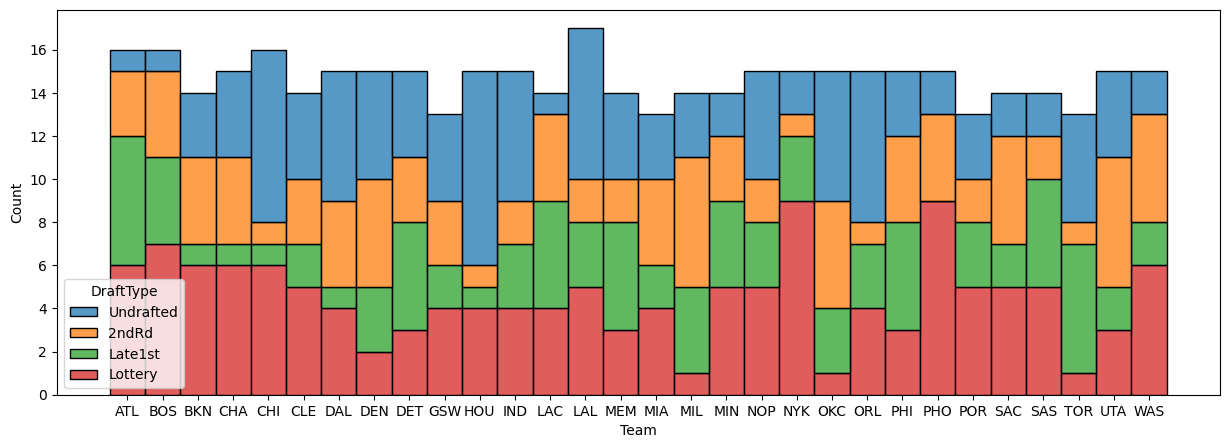

In [22]:
plt.figure(figsize=(15,5))
sns.histplot(data=pl_salary, x='Team', hue='DraftType', 
             hue_order=['Undrafted', '2ndRd', 'Late1st', 'Lottery'], multiple='stack')
plt.show()

As seen, the type of players within the teams varies significantly. New York Knicks have 9 Lottery picks in their roster, whereas the 2021 Champion Milwaukee Bucks only have 1:

In [23]:
pl_salary[pl_salary['Team'] == 'MIL']

,Team,Player,Salary,Draft,DraftTeam,Pick,Org,DraftType
237,MIL,Bobby Portis,3623000.0,2015.0,CHI,22.0,Arkansas,Late1st
238,MIL,Brook Lopez,12697675.0,2008.0,NJN,10.0,Stanford,Lottery
239,MIL,Bryn Forbes,2337145.0,NaN,None,NaN,None,Undrafted
240,MIL,Donte DiVencenzo,3044160.0,NaN,None,NaN,None,Undrafted
241,MIL,Giannis Antetokounmpo,27528088.0,2013.0,MIL,15.0,Basket Zaragoza 2002,Late1st
242,MIL,Jeff Teague,510589.0,2009.0,ATL,19.0,Wake Forest,Late1st
243,MIL,Jordan Nwora,898310.0,2020.0,MIL,45.0,Louisville,2ndRd
244,MIL,Jrue Holiday,25876111.0,2009.0,PHI,17.0,California-Los Angeles,Late1st
245,MIL,Khris Middleton,33051724.0,2012.0,DET,39.0,Texas A&M,2ndRd
246,MIL,Pat Connaughton,4938273.0,2015.0,BKN,41.0,Notre Dame,2ndRd


Let's check how the cap space is distributed within teams based on draft position:

In [24]:
salary_pivot = pl_salary.pivot_table(values='Salary', index=['Team'], columns=['DraftType'], aggfunc=np.sum)
groups = pd.DataFrame(salary_pivot.to_records())

groups = groups[['Team', 'Lottery', 'Late1st', '2ndRd', 'Undrafted']]

# Sum the individual salaries to sort
groups['total'] = groups.iloc[:, -4:].sum(axis=1)
groups = groups.sort_values('total', ascending=True).reset_index(drop=True)

# Drop the total column
groups = groups.drop('total', axis=1)

<Figure size 1200x600 with 0 Axes>

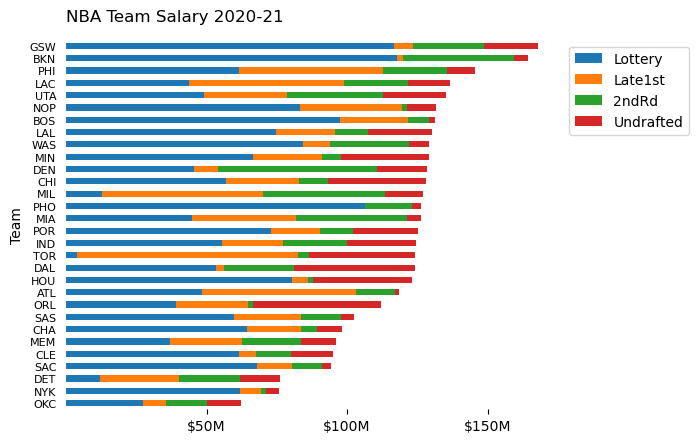

In [25]:
plt.figure(figsize=(12,6))
ax = groups.set_index('Team').plot(kind='barh', stacked=True)
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
ax.set_xticks([50000000, 100000000, 150000000])
ax.set_xticklabels(['$50M', '$100M', '$150M'])
ax.tick_params(axis='y', labelsize=8)
ax.tick_params(left=False)
ax.text(x=-80000, y=31,
        s='NBA Team Salary 2020-21',
        size=12)
plt.show()
plt.show()

As expected, lottery picks (picks 1-14) make the most money since they tend to be the best players. If we look at the averages through all teams:

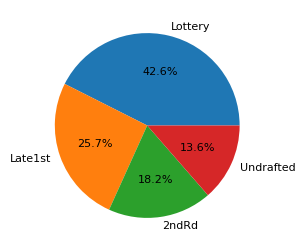

In [26]:
salary_pivot = pl_salary.pivot_table(values='Salary', index=['DraftType'], aggfunc=np.mean)
avg_salary = pd.DataFrame(salary_pivot.to_records())

avg_salary = avg_salary.sort_values('Salary', ascending=False).reset_index(drop=True)

plt.figure(figsize=(3,3))
plt.pie(avg_salary['Salary'], labels=['Lottery', 'Late1st', '2ndRd', 'Undrafted'], 
        autopct='%1.1f%%', textprops={'fontsize': 8})
plt.show()

Lottery picks account for 42.6% of all player salaries in the NBA with 1st round picks in general at 68.3%. Therefore it is safe to say that it pays to be selected in the first round of the NBA draft.

## International Players

We can check how many players the countries outside the US send to the NBA and rank them according to their populations. For that we need the world data: 

In [27]:
countries = pd.read_sql("""SELECT f.name, c.name AS largest_urban_area, 
                                  f.area, f.area_land,
                                  c.urban_pop, f.population AS total_pop,
                                  CAST(c.urban_pop AS FLOAT)/f.population AS urban_pct,
                                  ROUND(CAST(f.population AS FLOAT) / f.area_land, 3) AS pop_density
                             FROM facts AS f
                             LEFT JOIN (SELECT facts_id, name, capital, SUM(population) AS urban_pop
                                          FROM cities
                                         GROUP BY facts_id
                                        ) AS c ON c.facts_id = f.id; """, world)

countries.head()

,name,largest_urban_area,area,area_land,urban_pop,total_pop,urban_pct,pop_density
0,Afghanistan,Kabul,652230.0,652230.0,3097000.0,32564342.0,0.095104,49.928
1,Albania,Tirana,28748.0,27398.0,419000.0,3029278.0,0.138317,110.566
2,Algeria,Algiers,2381741.0,2381741.0,3699000.0,39542166.0,0.093546,16.602
3,Andorra,Andorra La Vella,468.0,468.0,23000.0,85580.0,0.268754,182.863
4,Angola,Luanda,1246700.0,1246700.0,6166000.0,19625353.0,0.314185,15.742


As seen, we added the total urban population to be able to calculate how the population is distributed. Urban area is defined as "urban agglomerations with populations of at least 750,000 people. An urban agglomeration is defined as comprising the city or town proper and also the suburban fringe or thickly settled territory lying outside of, but adjacent to, the boundaries of the city. For smaller countries, lacking urban centers of 750,000 or more, only the population of the capital is presented."

Source: https://www.cia.gov/the-world-factbook/field/major-urban-areas-population/

We can see that this eliminates small island or city states:

In [28]:
countries[countries['largest_urban_area'].isnull()].head(10)

,name,largest_urban_area,area,area_land,urban_pop,total_pop,urban_pct,pop_density
91,Kosovo,None,10887.0,10887.0,NaN,1870981.0,NaN,171.855
116,Monaco,None,2.0,2.0,NaN,30535.0,NaN,15267.500
122,Nauru,None,21.0,21.0,NaN,9540.0,NaN,454.286
148,San Marino,None,61.0,61.0,NaN,33020.0,NaN,541.311
155,Singapore,None,697.0,687.0,NaN,5674472.0,NaN,8259.785
189,Holy See (Vatican City),None,0.0,0.0,NaN,842.0,NaN,NaN
195,Taiwan,None,35980.0,32260.0,NaN,23415126.0,NaN,725.825
196,European Union,None,4324782.0,NaN,NaN,513949445.0,NaN,NaN
197,Ashmore and Cartier Islands,None,5.0,5.0,NaN,NaN,NaN,NaN
198,Christmas Island,None,135.0,135.0,NaN,1530.0,NaN,11.333


We can add the population from world data to the player attributes dataframe:

In [29]:
attributes['population'] = attributes['COUNTRY'].map(countries.set_index('name')['total_pop'])
attributes.head()

,ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,...,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,PTS,AST,REB,ALL_STAR_APPEARANCES,PIE,population
0,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24T00:00:00,Duke,USA,...,Y,1990,1,25,5.7,0.3,3.3,0.0,NaN,NaN
1,76002,Zaid,Abdul-Aziz,Zaid Abdul-Aziz,"Abdul-Aziz, Zaid",Z. Abdul-Aziz,zaid-abdul-aziz,1946-04-07T00:00:00,Iowa State,USA,...,Y,1968,1,5,9.0,1.2,8.0,0.0,NaN,NaN
2,76003,Kareem,Abdul-Jabbar,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",K. Abdul-Jabbar,kareem-abdul-jabbar,1947-04-16T00:00:00,UCLA,USA,...,Y,1969,1,1,24.6,3.6,11.2,18.0,NaN,NaN
3,51,Mahmoud,Abdul-Rauf,Mahmoud Abdul-Rauf,"Abdul-Rauf, Mahmoud",M. Abdul-Rauf,mahmoud-abdul-rauf,1969-03-09T00:00:00,Louisiana State,USA,...,Y,1990,1,3,14.6,3.5,1.9,0.0,NaN,NaN
4,1505,Tariq,Abdul-Wahad,Tariq Abdul-Wahad,"Abdul-Wahad, Tariq",T. Abdul-Wahad,tariq-abdul-wahad,1974-11-03T00:00:00,San Jose State,France,...,Y,1997,1,11,7.8,1.1,3.3,0.0,NaN,66553766.0


In [30]:
attributes[attributes['population'].isnull()]['COUNTRY'].value_counts()

USA                         4100
Bahamas                        3
Congo                          2
DRC                            2
US Virgin Islands              1
South Korea                    1
Scotland                       1
Republic of the Congo          1
St. Vincent & Grenadines       1
U.S. Virgin Islands            1
Name: COUNTRY, dtype: int64

As seen, some countries are not found in the world factbook dataset due to differences in the names. We can check the names in the world dataset and replace the names in the attributes to match:

In [31]:
missing_dict = {'USA':'United States', 'Bahamas':'Bahamas, The', 'Congo':'Congo, Republic of the',
               'Republic of the Congo':'Congo, Republic of the', 'DRC':'Congo, Democratic Republic of the',
               'South Korea':'Korea, South', 'U.S. Virgin Islands':'Virgin Islands', 'Scotland':'United Kingdom',
                'US Virgin Islands':'Virgin Islands', 'St. Vincent & Grenadines':'Saint Vincent and the Grenadines'}
attributes['COUNTRY'] = attributes['COUNTRY'].replace(missing_dict)

attributes.head()

,ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,...,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,PTS,AST,REB,ALL_STAR_APPEARANCES,PIE,population
0,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24T00:00:00,Duke,United States,...,Y,1990,1,25,5.7,0.3,3.3,0.0,NaN,NaN
1,76002,Zaid,Abdul-Aziz,Zaid Abdul-Aziz,"Abdul-Aziz, Zaid",Z. Abdul-Aziz,zaid-abdul-aziz,1946-04-07T00:00:00,Iowa State,United States,...,Y,1968,1,5,9.0,1.2,8.0,0.0,NaN,NaN
2,76003,Kareem,Abdul-Jabbar,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",K. Abdul-Jabbar,kareem-abdul-jabbar,1947-04-16T00:00:00,UCLA,United States,...,Y,1969,1,1,24.6,3.6,11.2,18.0,NaN,NaN
3,51,Mahmoud,Abdul-Rauf,Mahmoud Abdul-Rauf,"Abdul-Rauf, Mahmoud",M. Abdul-Rauf,mahmoud-abdul-rauf,1969-03-09T00:00:00,Louisiana State,United States,...,Y,1990,1,3,14.6,3.5,1.9,0.0,NaN,NaN
4,1505,Tariq,Abdul-Wahad,Tariq Abdul-Wahad,"Abdul-Wahad, Tariq",T. Abdul-Wahad,tariq-abdul-wahad,1974-11-03T00:00:00,San Jose State,France,...,Y,1997,1,11,7.8,1.1,3.3,0.0,NaN,66553766.0


Now we can append the count of NBA players back to the world dataframe:

In [32]:
country_list = attributes['COUNTRY'].unique()

countries['nba_players'] = 0

for country in country_list:
    no_players = len(attributes[attributes['COUNTRY'] == country])
    countries.loc[countries['name'] == country, 'nba_players'] = no_players

countries.head(10)

,name,largest_urban_area,area,area_land,urban_pop,total_pop,urban_pct,pop_density,nba_players
0,Afghanistan,Kabul,652230.0,652230.0,3097000.0,32564342.0,0.095104,49.928,0
1,Albania,Tirana,28748.0,27398.0,419000.0,3029278.0,0.138317,110.566,0
2,Algeria,Algiers,2381741.0,2381741.0,3699000.0,39542166.0,0.093546,16.602,0
3,Andorra,Andorra La Vella,468.0,468.0,23000.0,85580.0,0.268754,182.863,0
4,Angola,Luanda,1246700.0,1246700.0,6166000.0,19625353.0,0.314185,15.742,1
5,Antigua and Barbuda,Saint John'S,442.0,442.0,27000.0,92436.0,0.292094,209.131,0
6,Argentina,Buenos Aires,2780400.0,2736690.0,18951000.0,43431886.0,0.436338,15.870,12
7,Armenia,Yerevan,29743.0,28203.0,1116000.0,3056382.0,0.365138,108.371,0
8,Australia,Sydney,7741220.0,7682300.0,13789000.0,22751014.0,0.606083,2.961,19
9,Austria,Vienna,83871.0,82445.0,172000.0,8665550.0,0.019849,105.107,1


We can rank the countries according to how many NBA players they have produced per 1,000,000 people:

In [33]:
countries['nba_per_pop'] = round(countries['nba_players'] / countries['total_pop'] * 1000000, 2)
countries.sort_values('nba_per_pop', ascending=False).head(10)

,name,largest_urban_area,area,area_land,urban_pop,total_pop,urban_pct,pop_density,nba_players,nba_per_pop
246,Virgin Islands,Charlotte Amalie,1910.0,346.0,60000.0,103574.0,0.579296,299.347,2,19.31
185,United States,New York-Newark,9826675.0,9161966.0,60116000.0,321368864.0,0.187062,35.076,4100,12.76
146,Saint Vincent and the Grenadines,Kingstown,389.0,389.0,31000.0,102627.0,0.302065,263.823,1,9.74
11,"Bahamas, The",Nassau,13880.0,10010.0,254000.0,324597.0,0.782509,32.427,3,9.24
118,Montenegro,Podgorica,13812.0,13452.0,156000.0,647073.0,0.241086,48.102,5,7.73
145,Saint Lucia,Castries,616.0,606.0,21000.0,163922.0,0.128110,270.498,1,6.10
157,Slovenia,Ljubljana,20273.0,20151.0,273000.0,1983412.0,0.137642,98.427,11,5.55
43,Croatia,Zagreb,56594.0,55974.0,686000.0,4464844.0,0.153645,79.766,21,4.70
101,Lithuania,Vilnius,65300.0,62680.0,546000.0,2884433.0,0.189292,46.018,12,4.16
152,Serbia,Belgrade,77474.0,77474.0,1135000.0,7176794.0,0.158149,92.635,29,4.04


As seen, Virgin Islands has a higher density of NBA players as a result of having a much smaller population than United States. These players are:

In [34]:
attributes[attributes['COUNTRY'] == 'Virgin Islands']

,ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,...,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,PTS,AST,REB,ALL_STAR_APPEARANCES,PIE,population
273,1952,Raja,Bell,Raja Bell,"Bell, Raja",R. Bell,raja-bell,1976-09-19T00:00:00,Florida International,Virgin Islands,...,Y,Undrafted,Undrafted,Undrafted,9.9,1.7,2.8,0.0,NaN,NaN
1074,1495,Tim,Duncan,Tim Duncan,"Duncan, Tim",T. Duncan,tim-duncan,1976-04-25T00:00:00,Wake Forest,Virgin Islands,...,Y,1997,1,1,19.0,3.0,10.8,15.0,NaN,NaN


We can look at countries outside of the US with more than 1 mil. population:

In [35]:
mil_countries = countries[(countries['total_pop'] > 1000000) & (countries['name'] != 'United States')]
mil_countries.sort_values('nba_per_pop', ascending=False).head(10)

,name,largest_urban_area,area,area_land,urban_pop,total_pop,urban_pct,pop_density,nba_players,nba_per_pop
157,Slovenia,Ljubljana,20273.0,20151.0,273000.0,1983412.0,0.137642,98.427,11,5.55
43,Croatia,Zagreb,56594.0,55974.0,686000.0,4464844.0,0.153645,79.766,21,4.70
101,Lithuania,Vilnius,65300.0,62680.0,546000.0,2884433.0,0.189292,46.018,12,4.16
152,Serbia,Belgrade,77474.0,77474.0,1135000.0,7176794.0,0.158149,92.635,29,4.04
95,Latvia,Riga,64589.0,62249.0,701000.0,1986705.0,0.352846,31.915,7,3.52
245,Puerto Rico,San Juan,13791.0,8870.0,2475000.0,3598357.0,0.687814,405.677,7,1.95
83,Jamaica,Kingston,10991.0,10831.0,571000.0,2950210.0,0.193546,272.386,4,1.36
21,Bosnia and Herzegovina,Sarajevo,51197.0,51187.0,389000.0,3867055.0,0.100593,75.548,5,1.29
61,Gabon,Libreville,267667.0,257667.0,686000.0,1705336.0,0.402267,6.618,2,1.17
31,Canada,Toronto,9984670.0,9093507.0,15262000.0,35099836.0,0.434817,3.860,36,1.03


As seen, the top 5 is formed by former Yugoslavian countries (Slovenia, Croatia and Serbia) and former Soviet countries (Lithuania and Latvia) who are all known to be successfull basketball countries with a rich history of international basketball competition.

We can filter the countries even more by looking at only large countries, that is countries with more than 30 million population:

In [36]:
large_countries = countries[(countries['total_pop'] > 30000000) & (countries['name'] != 'United States')]
large_countries.sort_values('nba_per_pop', ascending=False).head(10)

,name,largest_urban_area,area,area_land,urban_pop,total_pop,urban_pct,pop_density,nba_players,nba_per_pop
31,Canada,Toronto,9984670.0,9093507.0,15262000.0,35099836.0,0.434817,3.860,36,1.03
60,France,Paris,643801.0,640427.0,20406100.0,66553766.0,0.306611,103.921,30,0.45
162,Spain,Madrid,505370.0,498980.0,7928000.0,48146134.0,0.164665,96.489,14,0.29
6,Argentina,Buenos Aires,2780400.0,2736690.0,18951000.0,43431886.0,0.436338,15.870,12,0.28
182,Ukraine,Kyiv,603550.0,579330.0,7105000.0,44429471.0,0.159916,76.691,9,0.20
178,Turkey,Istanbul,783562.0,769632.0,22753000.0,79414269.0,0.286510,103.185,11,0.14
64,Germany,Berlin,357022.0,348672.0,7628000.0,80854408.0,0.094342,231.892,11,0.14
82,Italy,Rome,301340.0,294140.0,11892000.0,61855120.0,0.192256,210.291,7,0.11
184,United Kingdom,London,243610.0,241930.0,17126000.0,64088222.0,0.267225,264.904,7,0.11
138,Poland,Warsaw,312685.0,304255.0,2479000.0,38562189.0,0.064286,126.743,3,0.08


We can check if there is any correlation between the different numerical features:

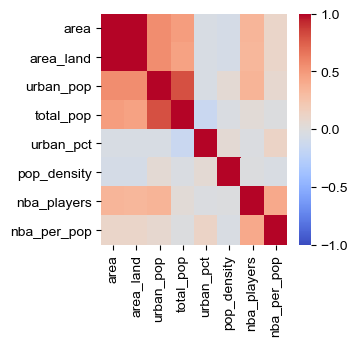

In [37]:
plt.figure(figsize=(3,3))
sns.heatmap(countries.corr(),
            vmin=-1,
            cmap='coolwarm');
sns.set(font_scale=1)

As seen, there is no meaningful correlation between the different features and number of NBA players. The highest positive correlation seems to be urban_pct. So we can compare urban population and number of nba players by scaling the two features using percentile ranks:

Correlation: 0.12439876127645096


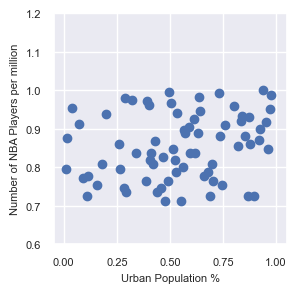

In [38]:
# We can use percentile rank to have the two factors in the same scale
countries['nba_per_pop_scaled'] = countries['nba_per_pop'].rank(pct = True)
countries['urban_pct_scaled'] = countries['urban_pct'].rank(pct = True)

print('Correlation: {}'.format(countries['urban_pct_scaled'].corr(countries['nba_per_pop_scaled'])))

# Plot only countries with NBA players
plt.figure(figsize=(3,3))
plt.scatter(countries['urban_pct_scaled'], countries['nba_per_pop_scaled'])
plt.xlabel('Urban Population %', fontsize=8)
plt.ylabel('Number of NBA Players per million', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylim(0.6,1.2)
plt.show()

Since the development of good basketball players do not depend on area or population, there is no correlation between these country stats. One could add the number of olympic medals or international competition appearances to find out how that translates to producing NBA players. This is outside the scope of the current study.

## Conclusions

In this project, we were able to use 2 different SQL databases to answer some questions on NBA player profiles. By using various query methods, we generated a number of different datasets according to our requirements. These datasets then enabled us to practice a variety of data visualization techniques, both exploratory and explanatory.